In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd 
import numpy as np 

In [2]:
d1 = pd.read_csv('F:\GITHUB\Python\Plotting - Data.csv')

In [3]:
d1.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [4]:
d1_new = d1.loc[d1.cyl.isin([4,5]),:]

In [5]:
# Alternative way
d1_new1 = d1.loc[(d1['cyl'] == 4) | (d1['cyl']== 8)]   

In [6]:
print('length:',len(d1_new1))
d1_new1.head(3)

length: 151


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


## Scatterplot with Best fit line [sns.lmplot]

C:\Users\Premstein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


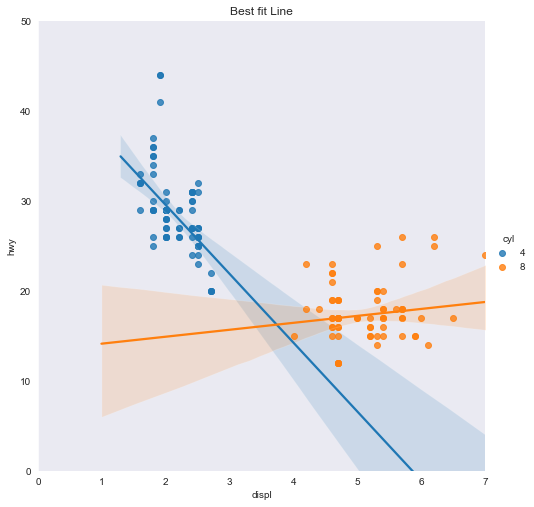

In [7]:
sns.set_style('dark')
plot = sns.lmplot(x='displ',y='hwy',data=d1_new1,hue='cyl',height=7,palette='tab10',robust=True)

# Parameter 'hue' is used for displaying graph in the same container (Merged graph)
plot.set(xlim=(0,7),ylim=(0,50))
plot.set(title='Best fit Line')

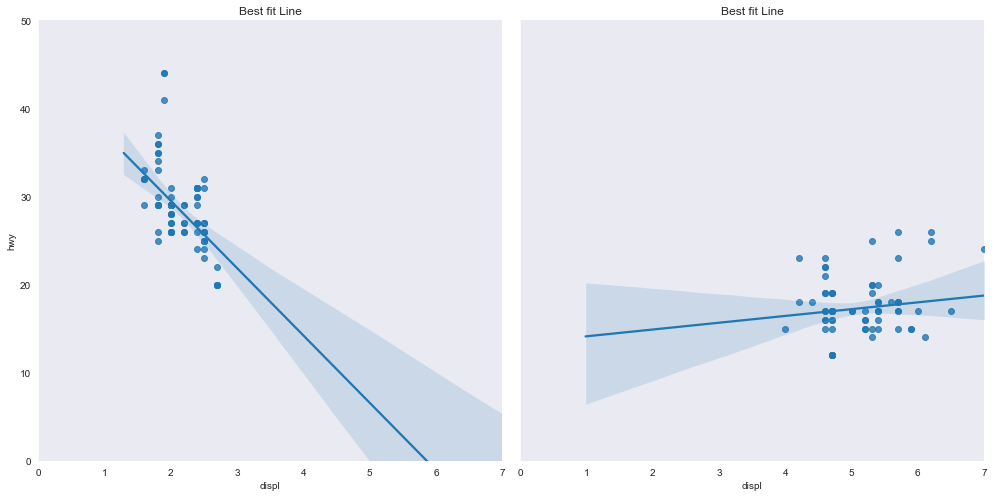

In [8]:
plot = sns.lmplot(x='displ',y='hwy',data=d1_new1,col='cyl',height=7,palette='tab10',robust=True)

"""

Parameter 'col' is used for displaying graph in same container but in different columns
similiarly 'row' is used for displaying graph in different rows

"""


plot.set(xlim=(0,7),ylim=(0,50))
plot.set(title='Best fit Line')

## JITTER PLOT - Multiple data points at the same coordinates, COUNT PLOT - Represents the true represtation of data counts

In [9]:
d1_count = d1.groupby(['cty','hwy']).size().reset_index(name='model')

Text(0.5, 0.98, 'COUNT & JITTER PLOT')

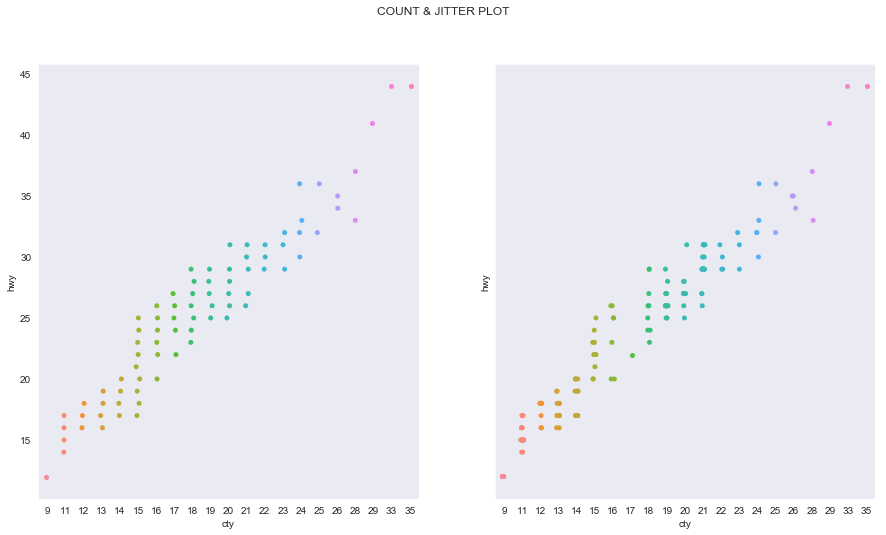

In [10]:
fig,axes = plt.subplots(1,2,figsize=(15,8),sharey=True)
sns.stripplot(x='cty',y='hwy',data=d1_count,ax=axes[0],label='COUNT PLOT')
sns.stripplot(x='cty',y='hwy',data=d1_new1,ax=axes[1],label='JITTER PLOT')
# for i in axes:
#     i.legend()
plt.suptitle('COUNT & JITTER PLOT')

## DIVERGING BARS

In [11]:
# CAR MILEAGE DIVERGING BAR GRAPH

d2 = pd.read_csv('F:/GITHUB/Python/Car_Mileage.csv')

In [12]:
x = d2.loc[:,['mpg']]
x['mpg_z'] = (x - x.mean())/x.std()
x['color'] = ['RED' if x < 0 else 'GREEN' for x in x.mpg_z]
x.sort_values('mpg_z',inplace=True)

In [13]:
cars = d2[['cars','qsec']]
xy =x.join(cars)
xy.reset_index(inplace=True)

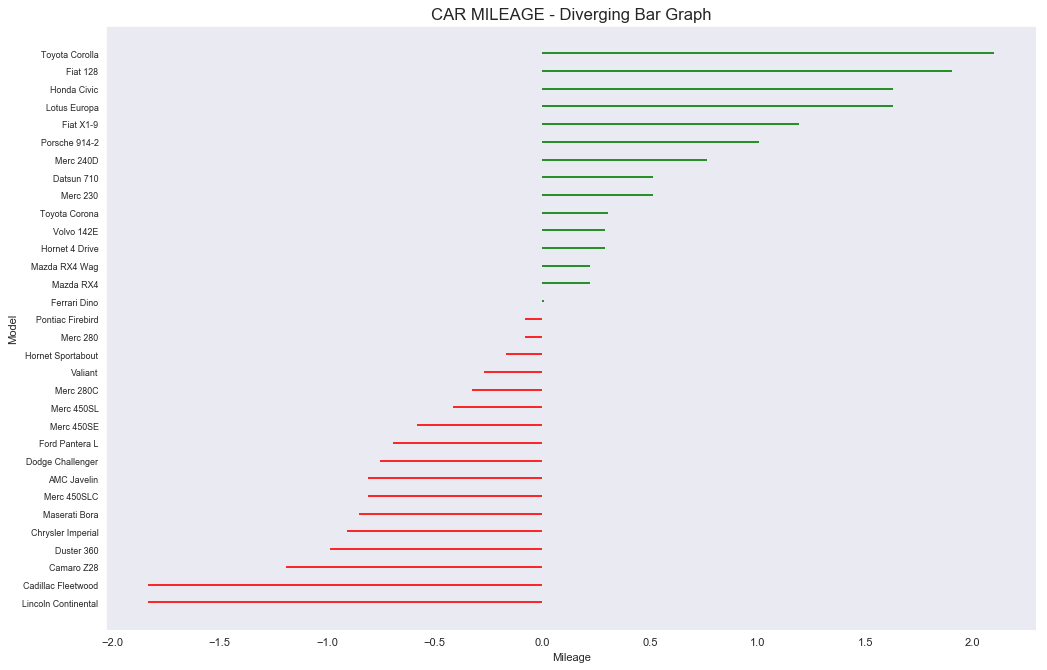

In [14]:
plt.figure(figsize=(15,10),dpi=80)
plt.hlines(y=xy.index,data=xy,xmin=0,xmax=xy.mpg_z,colors=xy.color)
plt.title('CAR MILEAGE - Diverging Bar Graph',fontsize=15)

plt.yticks(ticks=xy.index,labels=xy.cars,fontsize=8)
plt.xlabel('Mileage')
plt.ylabel('Model')
plt.show()

## AREA CHART

In [15]:
d3 = pd.read_csv('F:/GITHUB/Python/Economic_return.csv',parse_dates=['date'])
d3_date= pd.to_datetime(d3.date)
d3_f1 = d3.head(102)
d3_f1.tail()

,date,pce,pop,psavert,uempmed,unemploy
97,1975-01-08,1049.4,216195,12.6,9.2,7928
98,1975-01-09,1057.2,216393,12.6,9.2,7923
99,1975-01-10,1063.2,216587,13.0,8.6,7897
100,1975-01-11,1078.0,216771,12.3,9.5,7794
101,1975-01-12,1094.4,216931,11.5,9.0,7744


In [16]:
x = np.arange(d3_f1.shape[0])

In [17]:
ps_return =(d3_f1.psavert.diff().fillna(0)/d3_f1.psavert.shift(1).fillna(0))*100 

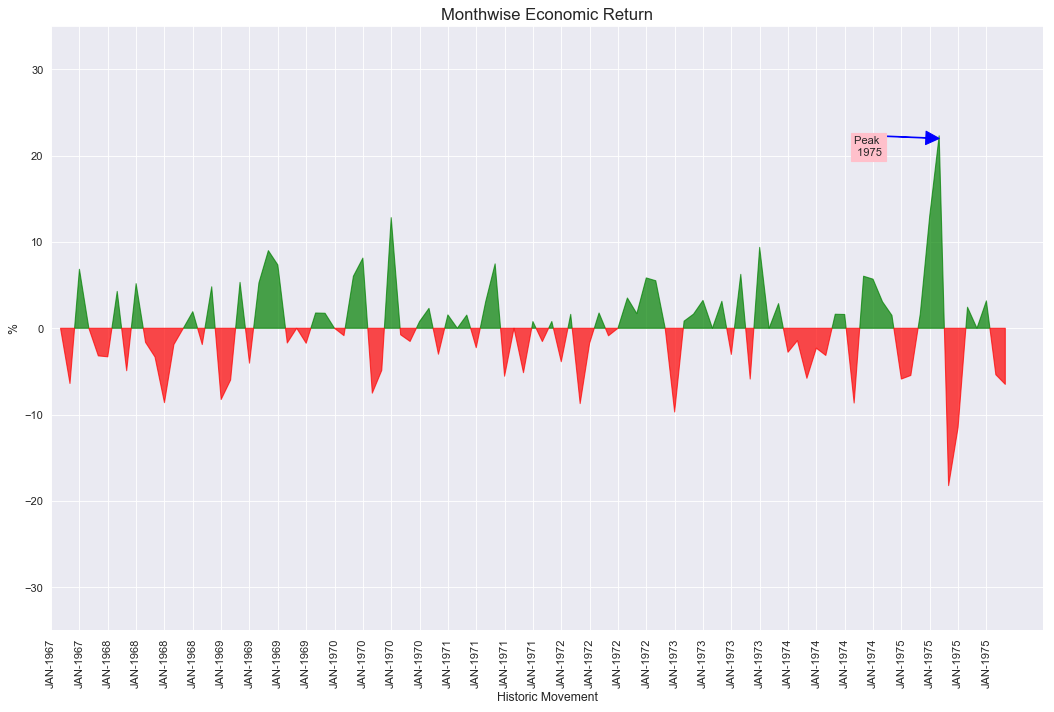

In [18]:
plt.figure(figsize=(16,10),dpi=80)
plt.fill_between(x=x[1:],y1=ps_return[1:],y2=0,where=ps_return[1:]>0,interpolate=True,color='Green',alpha=0.7)
plt.fill_between(x=x[1:],y1=ps_return[1:],y2=0,where=ps_return[1:]<0,interpolate=True,color='Red',alpha=0.7)


### Annotate

plt.annotate('Peak \n 1975',xy=(94.0,22.0),xytext=(85,20),
            bbox=dict(boxstyle='Square',color='Pink'),
            arrowprops= dict(width=0.5,color= 'Blue'))
            
### Decoration 


plt.xlim(0,105)
plt.ylim(-35,35)
plt.xlabel('Historic Movement',fontsize=11)
plt.ylabel('%',fontsize=11)
plt.gca().set_title('Monthwise Economic Return',fontsize=15)
plt.grid(alpha=1)

### Extracting month and year data

xtickval = [str(month)[:3].upper()+"-"+str(year) for year,month in zip(d3_date.dt.year,d3_date.dt.month_name())]
plt.gca().set_xticks(x[::3])
plt.gca().set_xticklabels(xtickval[::3],rotation=90)
plt.show()

## POPULATION PYRAMID GRAPH

In [19]:
d4 = pd.read_csv('F:\GITHUB\Python\Population Pyramid.csv')

In [20]:
# Grouping of Stage & Gender

d4_gp = d4.groupby(['Stage','Gender'])['Users'].sum().to_frame().reset_index()
d4_gp.set_index('Stage',inplace=True)

In [21]:
d4male= d4_gp.loc[(d4_gp['Gender']=='Male','Users')]
d4female= d4_gp.loc[(d4_gp['Gender']=='Female','Users')]

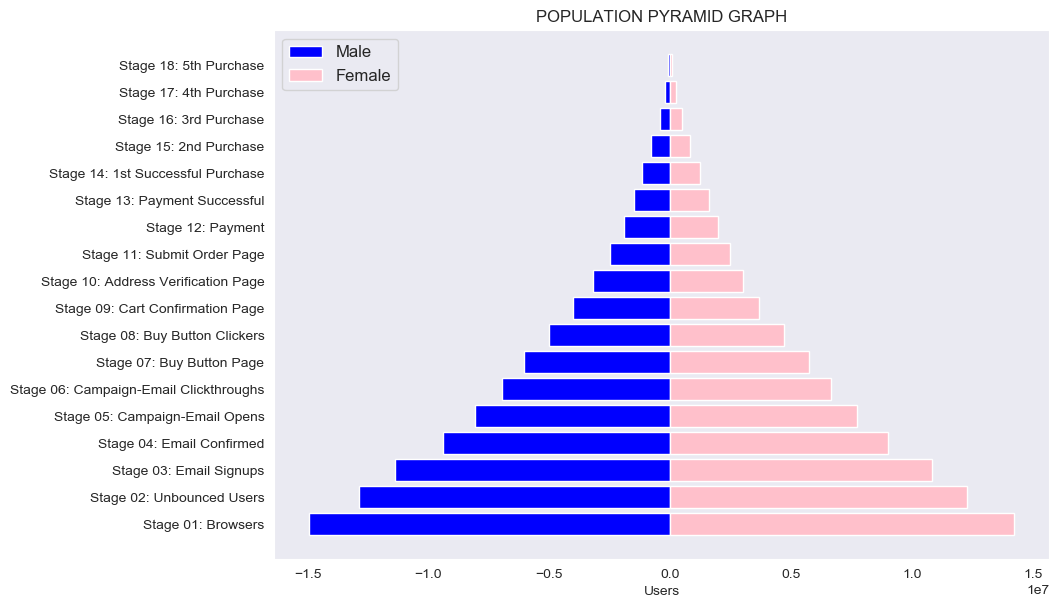

In [22]:
# Ploting the data

fig,ax = plt.subplots(figsize=(10,7),dpi=100)

ax.barh(d4male.index,d4male,color='Blue',label = 'Male')
ax.barh(d4female.index,d4female,color='pink',label='Female')
plt.legend(loc='upper left',fontsize=12)
plt.title('POPULATION PYRAMID GRAPH')
plt.xlabel('Users')
plt.show()

## ORDERED BAR GRAPH

In [23]:
d5= d1
d5.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [24]:
d5_gp = d5.groupby(['manufacturer'])['cyl','cty','hwy'].mean()
d5_gp.sort_values('hwy',ascending=False,inplace=True)
d5_gp.head(3)

,cyl,cty,hwy
manufacturer,,,
honda,4.000000,24.444444,32.555556
volkswagen,4.592593,20.925926,29.222222
hyundai,4.857143,18.642857,26.857143


In [25]:
x = d5_gp.index
y = d5_gp.hwy

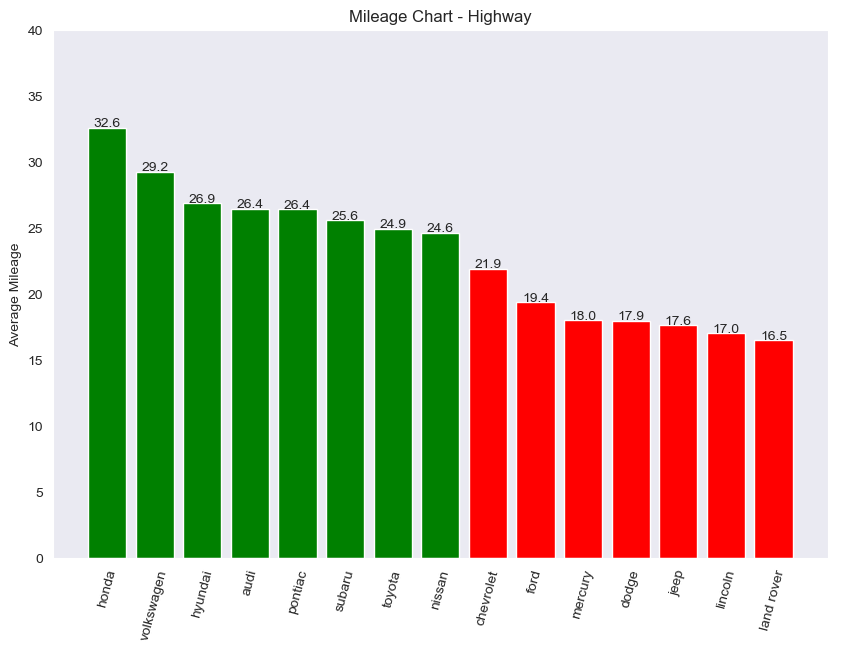

In [26]:
# Plotting the graph

fig,ax = plt.subplots(figsize=(10,7),dpi=100)

for x_,y_ in zip(x,y):
    ax.bar(x_,y_,color = 'Red' if y_ < y.mean() else 'Green')
    ax.text(x_,y_+.1,round(y_,1),ha='center',fontsize=10)
    
ax.set_xticklabels(x,rotation=75)
plt.yticks(np.arange(0,45,5),np.arange(0,45,5),fontsize=10)
#ax.yaxis.set_major_locator(plt.MultipleLocator(5))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
# plt.tick_params(axis='y_',which='Major',length=10,width=2)
# plt.tick_params(axis='y_',which='Minor',length=8,width=2)
plt.title('Mileage Chart - Highway',fontsize=12)
plt.ylabel('Average Mileage')
plt.show()

In [27]:
y_h= d5_gp.hwy
y_c = d5_gp.cty

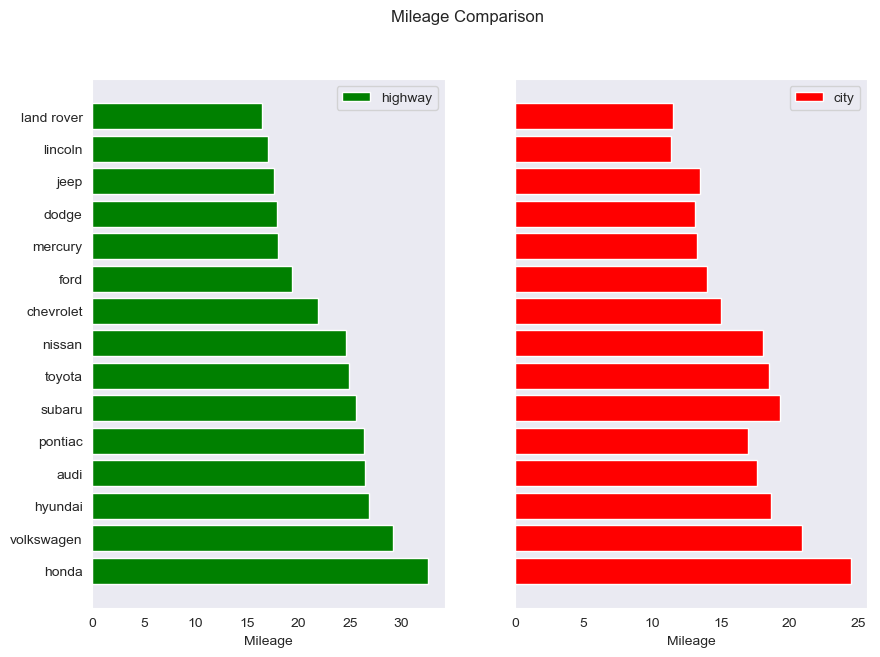

In [28]:
# Mileage Comparison

fig,axs = plt.subplots(1,2,figsize=(10,7),dpi=100,sharey=True)

axs[0].barh(x,y_h,label='highway',color='Green')
axs[1].barh(x,y_c,label='city',color='Red')

axs[0].legend()
axs[1].legend()
plt.suptitle('Mileage Comparison')
axs[0].set_xlabel('Mileage')
axs[1].set_xlabel('Mileage')
plt.show()

## BASIC PIE CHART

In [29]:
d6 = d1
d6.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [30]:
# Creating a dictionary with function value_count

d6_gp = d6['class'].value_counts().to_dict()

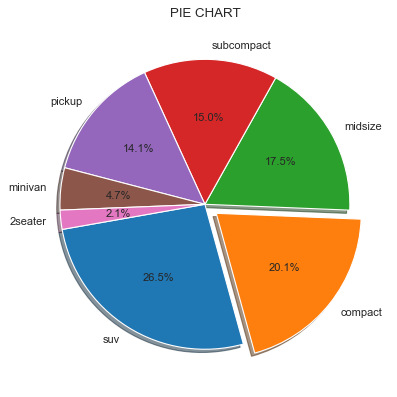

In [31]:
plt.figure(figsize=(6,6),dpi=80)
explode = [0,0.1,0,0,0,0,0]         # argument used to bring aestetic feature in pie chart

plt.pie(d6_gp.values(),labels=d6_gp.keys(),explode=explode,shadow=True,startangle=190,autopct="%.1f%%")
plt.title('PIE CHART')
plt.show()

## BOX PLOT

In [32]:
d7 = d1
d7_gp = d7[['class','hwy']]

TypeError: can only concatenate list (not "float") to list

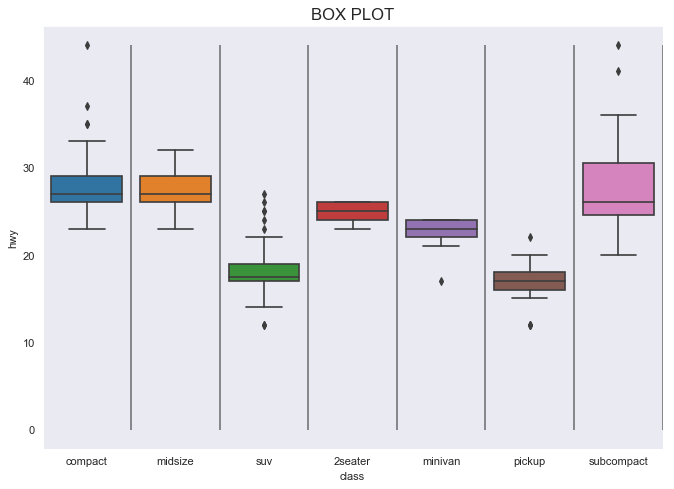

In [34]:
plt.figure(figsize=(10,7),dpi=80)
sns.boxplot(x=d7_gp['class'],y=d7_gp['hwy'])
plt.title('BOX PLOT',fontsize=15)
xtick = plt.xticks()

for ticks in xtick:
    plt.vlines(ticks + 0.5,0,np.max(d7_gp['hwy']),colors='black',alpha=.5)

plt.ylim(10,40)
plt.show()

## VIOLIN PLOT

In [35]:
# Violin plot helps to identify probabilty density of data at different data points

d8 = d1
d8_gp = d8[['class','hwy']]

C:\Users\Premstein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: can only concatenate list (not "float") to list

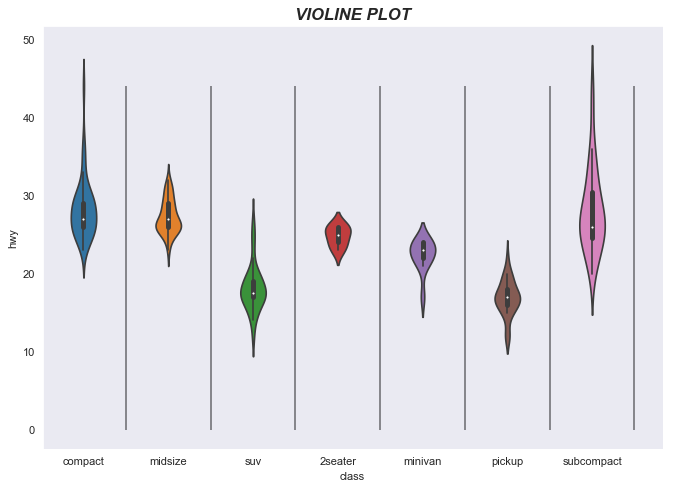

In [36]:
plt.figure(figsize=(10,7),dpi=80)
plt.title('VIOLINE PLOT',fontsize=15,fontweight='bold',fontstyle='italic')   
sns.violinplot(x=d8_gp['class'],y=d8_gp['hwy'],scale='width',width=0.3)
xticks = plt.xticks()
for tick in xticks:
    plt.vlines(tick + 0.5,0,np.max(d8_gp['hwy']),colors='black',alpha=0.5)


plt.show()